In [48]:
# !pip install xgboost
import xgboost 
import pandas 
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


In [49]:
data = pandas.read_csv('../Data/supermarket/original.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [50]:
data['Order Date'] = pandas.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pandas.to_datetime(data['Ship Date'], dayfirst=True)

In [51]:
columns_using = ['Category', 'Sub-Category', 'Ship Mode']
X = data[columns_using]
y = data[['Segment']]
encoder = OrdinalEncoder()
train_size = 0.7

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, random_state=0, shuffle=False)

X_train, X_test = encoder.fit_transform(X_train), encoder.fit_transform(X_test)
predictions = encoder.fit_transform(y_train)
y_train, y_test = encoder.fit_transform(y_train), encoder.fit_transform(y_test)


In [52]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [53]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [54]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.17%


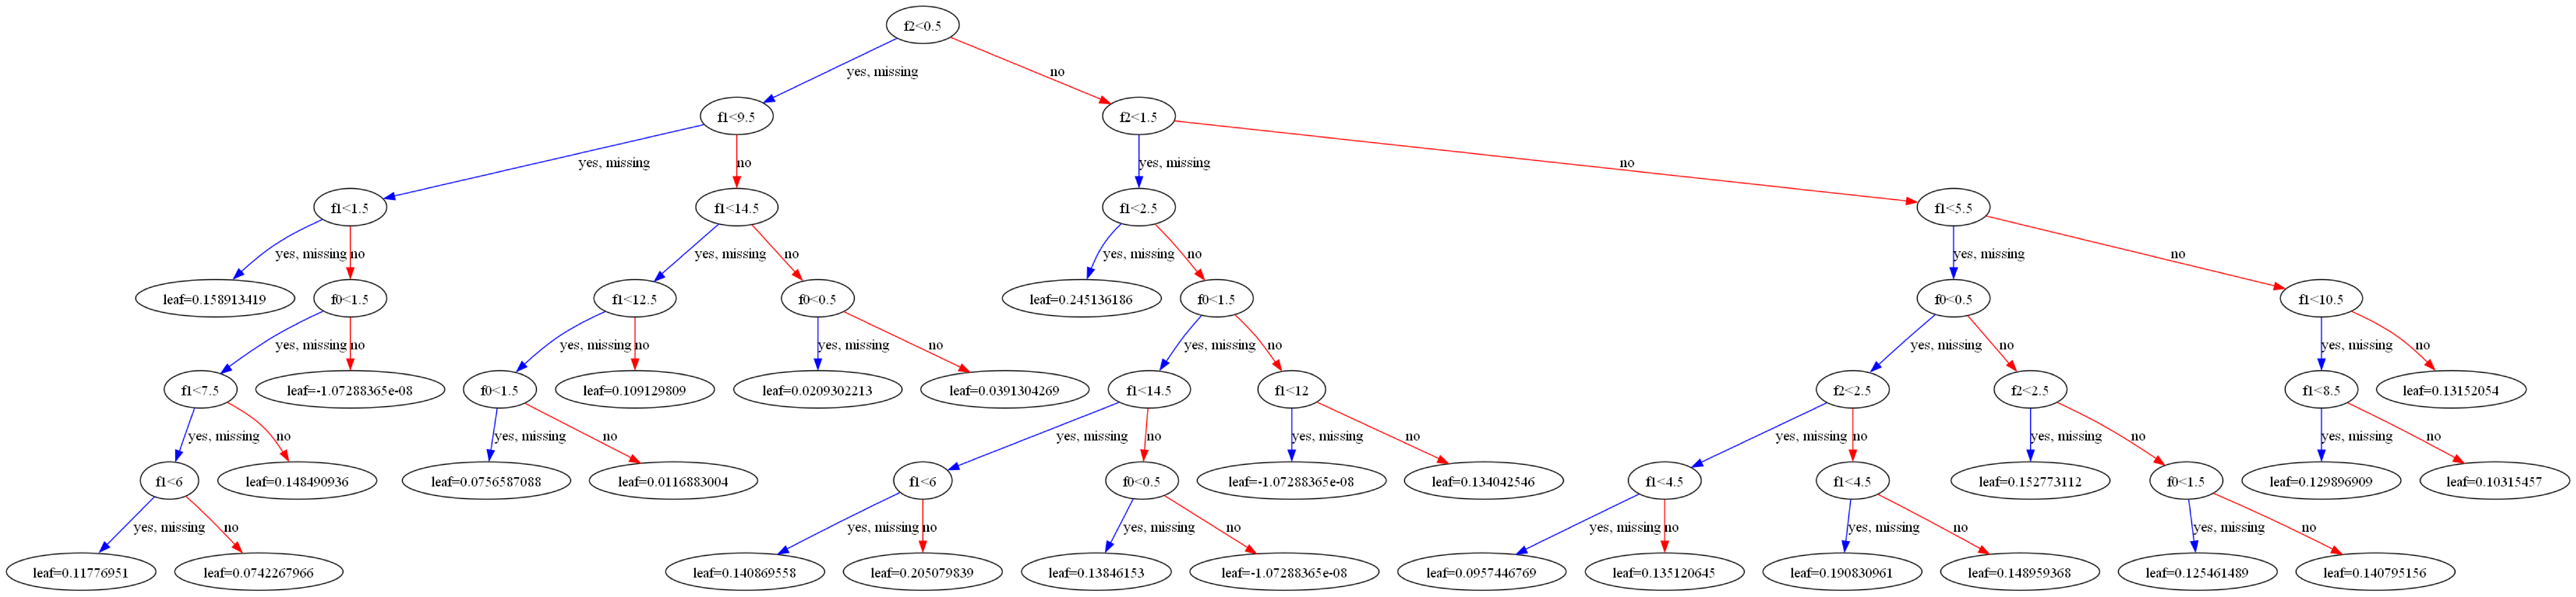

In [55]:
# # !pip install graphviz 
xgboost.plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
# plt.savefig('./1.png')
plt.show()

In [56]:
predictions = encoder.inverse_transform(numpy.array(predictions).reshape(-1,1))
predictions = predictions.ravel()

In [57]:
# !pip3 install openpyxl
result = data[columns_using]
result['Actual Segment'] = y 
result['Predicted Segment'] = numpy.nan 
result['Predicted Segment'].iloc[int(len(data)*train_size):] = predictions
# result.to_excel('./XGBoostResult.xlsx')
result

C:\Users\AspireA514\AppData\Local\Temp\ipykernel_23492\3668904369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Actual Segment'] = y
C:\Users\AspireA514\AppData\Local\Temp\ipykernel_23492\3668904369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Predicted Segment'] = numpy.nan
C:\Users\AspireA514\AppData\Local\Temp\ipykernel_23492\3668904369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,Category,Sub-Category,Ship Mode,Actual Segment,Predicted Segment
0,Furniture,Bookcases,Second Class,Consumer,NaN
1,Furniture,Chairs,Second Class,Consumer,NaN
2,Office Supplies,Labels,Second Class,Corporate,NaN
3,Furniture,Tables,Standard Class,Consumer,NaN
4,Office Supplies,Storage,Standard Class,Consumer,NaN
...,...,...,...,...,...
9795,Office Supplies,Binders,Standard Class,Corporate,Consumer
9796,Office Supplies,Art,Standard Class,Corporate,Consumer
9797,Technology,Phones,Standard Class,Corporate,Consumer
9798,Technology,Phones,Standard Class,Corporate,Consumer


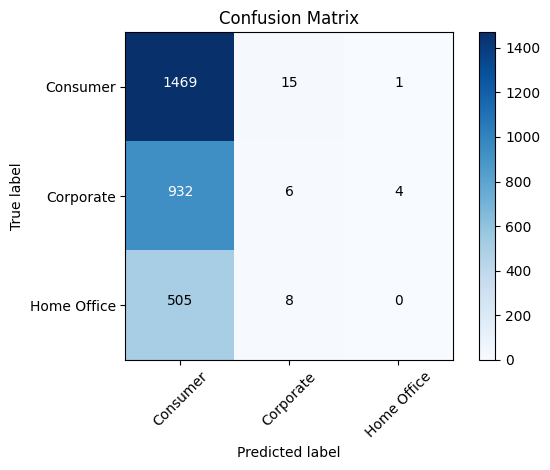

In [58]:
cm = confusion_matrix(encoder.inverse_transform(y_test), predictions)
classes = numpy.unique(encoder.inverse_transform(y_test))

## Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = numpy.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

## Add labels to each cell
thresh = cm.max() / 2.
for i, j in numpy.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', 
             color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Cac thuat toan khac

In [62]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

predicted_values = knn.predict(X_test)

x = accuracy_score(y_test, predicted_values)

print("KNN Accuracy Score is:", x*100)

KNN Accuracy Score is: 48.775510204081634


c:\Users\AspireA514\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [60]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,criterion = "entropy")
rfc.fit(X_train,y_train)

predict_r = rfc.predict(X_test)

x = accuracy_score(y_test, predict_r)

print("Random Forest Accuracy Score is:", x*100)

C:\Users\AspireA514\AppData\Local\Temp\ipykernel_23492\1511281617.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


Random Forest Accuracy is:  50.27210884353741
